In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [4]:
main_data = pd.read_csv('train.tsv',sep='\t')
main_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [14]:
main_data = main_data[:100]

In [16]:
main_data.Sentiment.value_counts()

2    80
3    10
1     6
4     4
Name: Sentiment, dtype: int64

In [7]:
main_data[main_data.isnull().any(1)]

,PhraseId,SentenceId,Phrase,Sentiment


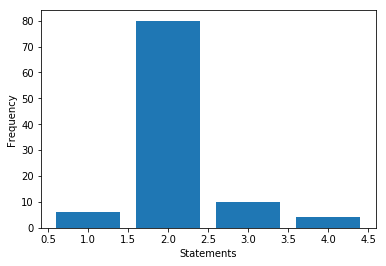

Wall time: 797 ms


In [21]:
%%time
sent_count = main_data.groupby(by='Sentiment').count()
plt.bar(sent_count.index.values, sent_count['Phrase'])
plt.xlabel('Statements')
plt.ylabel('Frequency')
plt.show()

#### Countvectorise

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [27]:
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,2),tokenizer = token.tokenize)
text_counts= cv.fit_transform(main_data['Phrase'])

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(text_counts,main_data['Sentiment'],test_size=0.3,random_state=3)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(x_train, y_train)
predicted= clf.predict(x_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8


#### TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvector = TfidfVectorizer()
text_tf = tfvector.fit_transform(main_data['Phrase'])

In [38]:
x1_train,x1_test,y1_train,y1_test = train_test_split(text_tf,main_data['Sentiment'],test_size=0.3,random_state=3)

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(x1_train, y1_train)
predicted= clf.predict(x1_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y1_test, predicted))

MultinomialNB Accuracy: 0.9
